In [2]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from sklearn.datasets import load_iris
from datetime import datetime, timedelta


from scipy import stats

from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

In [5]:
#Loading the data
df = pd.read_csv("/Users/silvergeorge/Desktop/ECommerce.csv")

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    535874 non-null  object 
 2   Description  534420 non-null  object 
 3   Quantity     535874 non-null  float64
 4   InvoiceDate  535874 non-null  object 
 5   UnitPrice    535874 non-null  float64
 6   CustomerID   403182 non-null  float64
 7   Country      535874 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,535874.000000,535874.000000,403182.000000
mean,9.587927,4.636533,15287.687868
std,153.292222,97.302232,1714.009551
min,-74215.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13952.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,74215.000000,38970.000000,18287.000000


In [8]:
#Checking for missing values in the dataset
df.isnull().sum()

InvoiceNo           0
StockCode        6035
Description      7489
Quantity         6035
InvoiceDate      6035
UnitPrice        6035
CustomerID     138727
Country          6035
dtype: int64

In [9]:
df.query('UnitPrice < 0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1.0,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1.0,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [10]:
df.query('Quantity < 0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1.0,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1.0,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12.0,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24.0,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24.0,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11.0,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1.0,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5.0,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1.0,12/9/2011 11:58,1.25,17315.0,United Kingdom


if there are dublicates, exolore them to know what is in there before deciding what to do with it.

In [11]:
#Converting InvoiceDate to DateTime Object
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#Converting the Customer ID to categorical data type
df['CustomerID'] = df['CustomerID'].astype('category')

In [12]:
#Checking for duplicates
duplicates =df.duplicated()
number_of_duplicates = df.duplicated().sum()
duplicate_rows = df[duplicates]

number_of_duplicates, duplicate_rows

(np.int64(5268),
        InvoiceNo StockCode                        Description  Quantity  \
 517       536409     21866        UNION JACK FLAG LUGGAGE TAG       1.0   
 527       536409     22866      HAND WARMER SCOTTY DOG DESIGN       1.0   
 537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON        1.0   
 539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE       1.0   
 555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS       1.0   
 ...          ...       ...                                ...       ...   
 541675    581538     22068        BLACK PIRATE TREASURE CHEST       1.0   
 541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS       1.0   
 541692    581538     22992             REVOLVER WOODEN RULER        1.0   
 541699    581538     22694                       WICKER STAR        1.0   
 541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS        1.0   
 
                InvoiceDate  UnitPrice CustomerID         Country  
 

In [13]:
# Identifying rows with any empty(NaN) values
rows_with_nan = df.isnull().any(axis=1)

# Counting the number of rows with any empty(NaN) values
num_rows_with_nan = rows_with_nan.sum()

# Displaying the count and a sample of such rows
num_rows_with_nan, df[rows_with_nan].head() if num_rows_with_nan > 0 else "No rows with missing values"

(np.int64(138727),
                                              InvoiceNo StockCode Description  \
 109  536381,82567,"AIRLINE LOUNGE,METAL SIGN",2,12/...       NaN         NaN   
 253  536394,21506,"FANCY FONT BIRTHDAY CARD, ",24,1...       NaN         NaN   
 622                                             536414     22139         NaN   
 871  536477,22041,"RECORD FRAME 7"" SINGLE SIZE ",4...       NaN         NaN   
 956  536520,22760,"TRAY, BREAKFAST IN BED",1,12/1/2...       NaN         NaN   
 
      Quantity         InvoiceDate  UnitPrice CustomerID         Country  
 109       NaN                 NaT        NaN        NaN             NaN  
 253       NaN                 NaT        NaN        NaN             NaN  
 622      56.0 2010-12-01 11:52:00        0.0        NaN  United Kingdom  
 871       NaN                 NaT        NaN        NaN             NaN  
 956       NaN                 NaT        NaN        NaN             NaN  )

In [14]:
#Removing all rows with any missing values
df = df.dropna()

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680.0,France


In [15]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [16]:
#Creating a Revenue Column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

df

/var/folders/pd/lxnkslc138l6f4x6t0pvv_0w0000gn/T/ipykernel_6661/644772174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue'] = df['Quantity'] * df['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16.60


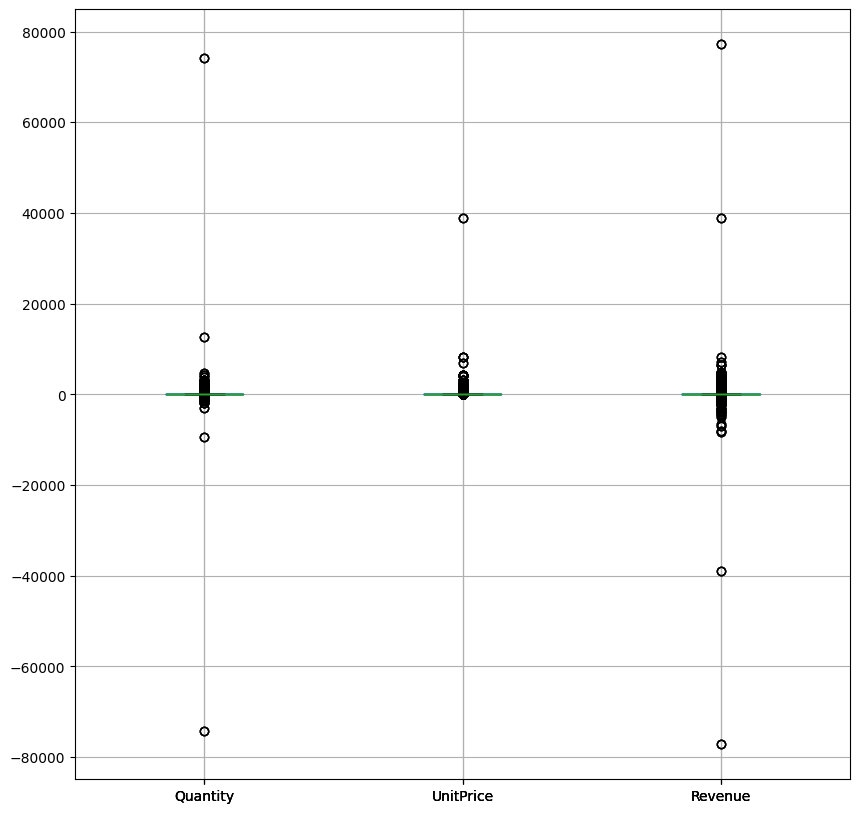

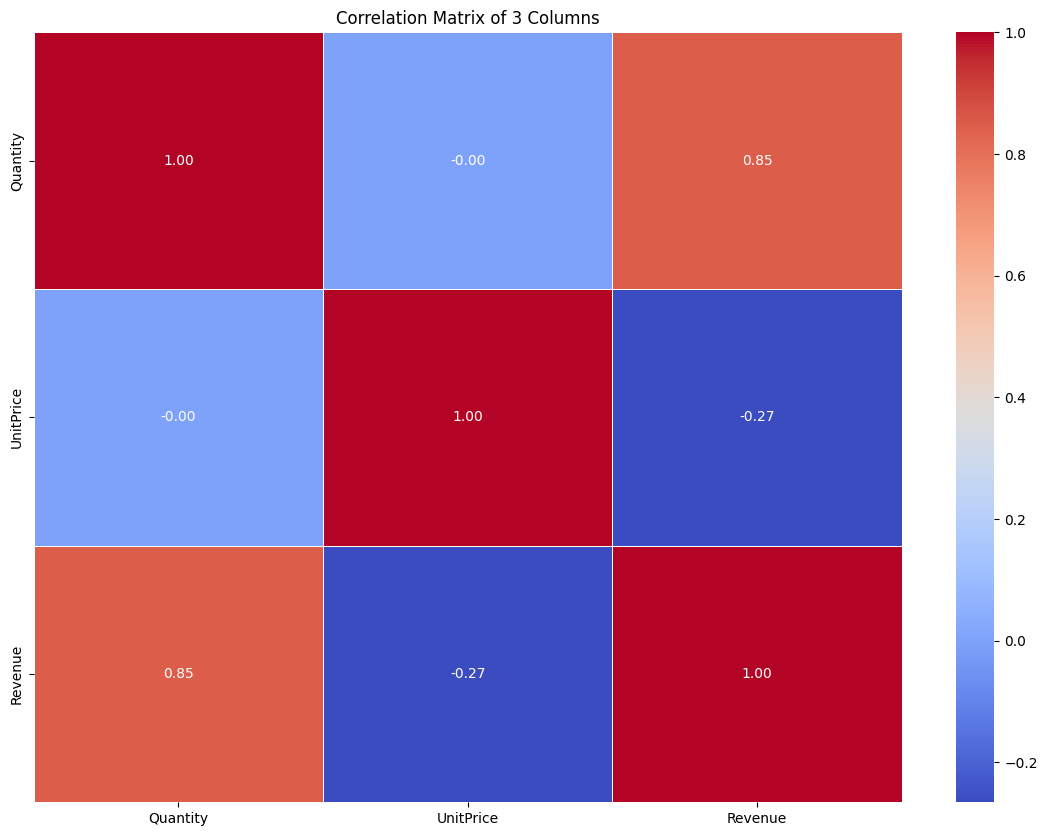

In [29]:
#Correlation Matrix between factors
CM = df.select_dtypes(include=["number"]).corr()
plt.figure(figsize=(14, 10))
sns.heatmap(CM, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of 3 Columns')
plt.show()

Top Customers(Customers who provide the most revenue)

/var/folders/pd/lxnkslc138l6f4x6t0pvv_0w0000gn/T/ipykernel_6661/2558122857.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_revenue_per_customer = df.groupby('CustomerID')['Revenue'].sum()


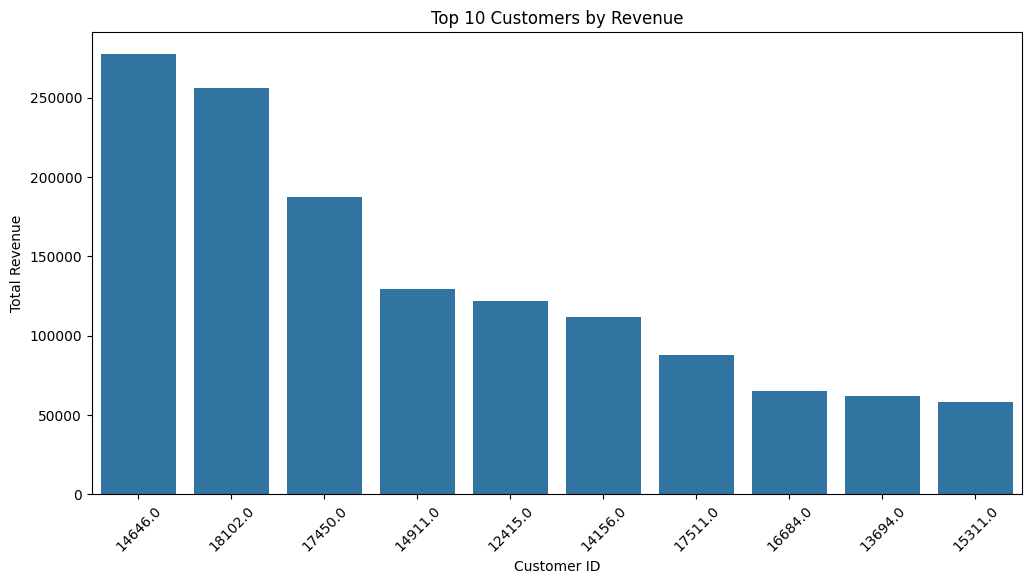

In [31]:
total_revenue_per_customer = df.groupby('CustomerID')['Revenue'].sum()
total_revenue_per_customer = total_revenue_per_customer.sort_values(ascending=False)
top_customers = total_revenue_per_customer.head(10)  # Top 10 customers

plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values)
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()



Customers who make the most Purchases

/var/folders/pd/lxnkslc138l6f4x6t0pvv_0w0000gn/T/ipykernel_6661/4053556121.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transaction_count_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique()


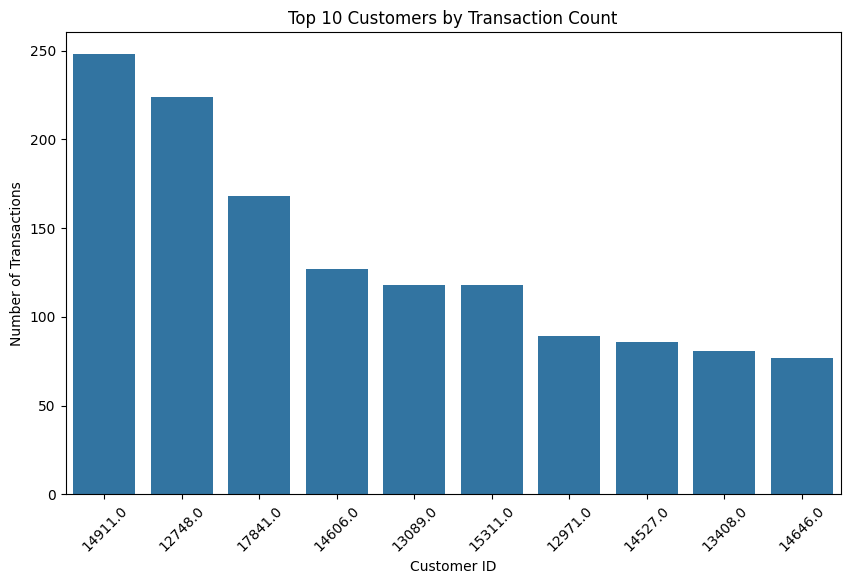

In [32]:
transaction_count_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique()
transaction_count_per_customer = transaction_count_per_customer.sort_values(ascending=False)
top_customers_by_transactions = transaction_count_per_customer.head(10)  # Top 10 customers

plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers_by_transactions.index.astype(str), y=top_customers_by_transactions.values)
plt.title('Top 10 Customers by Transaction Count')
plt.xlabel('Customer ID')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


Product that give the most revenue

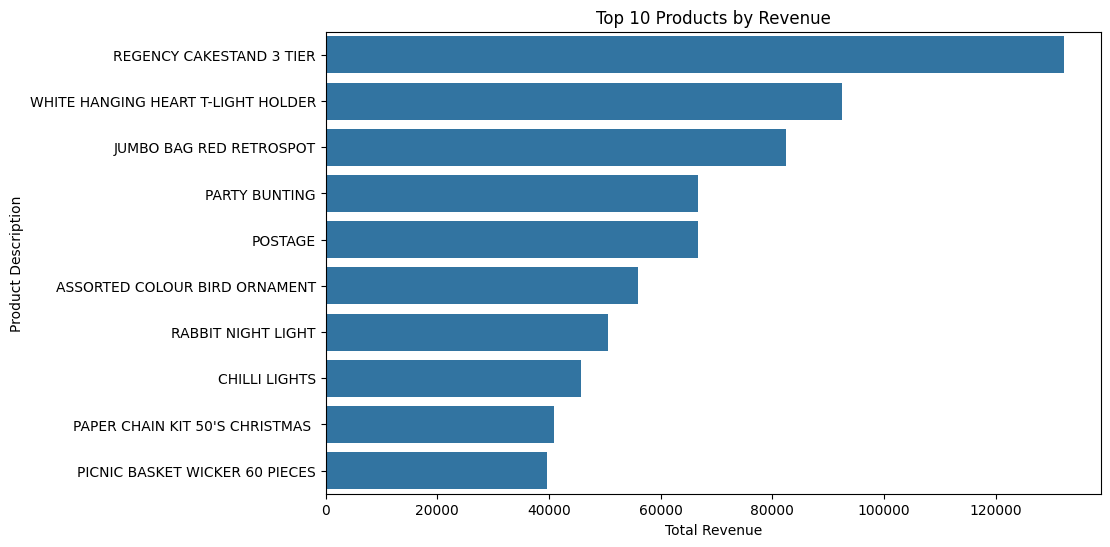

In [33]:
total_revenue_per_product = df.groupby('Description')['Revenue'].sum()
total_revenue_per_product = total_revenue_per_product.sort_values(ascending=False)
top_products_by_revenue = total_revenue_per_product.head(10)  # Top 10 products

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products_by_revenue.values, y=top_products_by_revenue.index)
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Description')
plt.show()


Countries with the higest Revenue(Highest Total Sales)

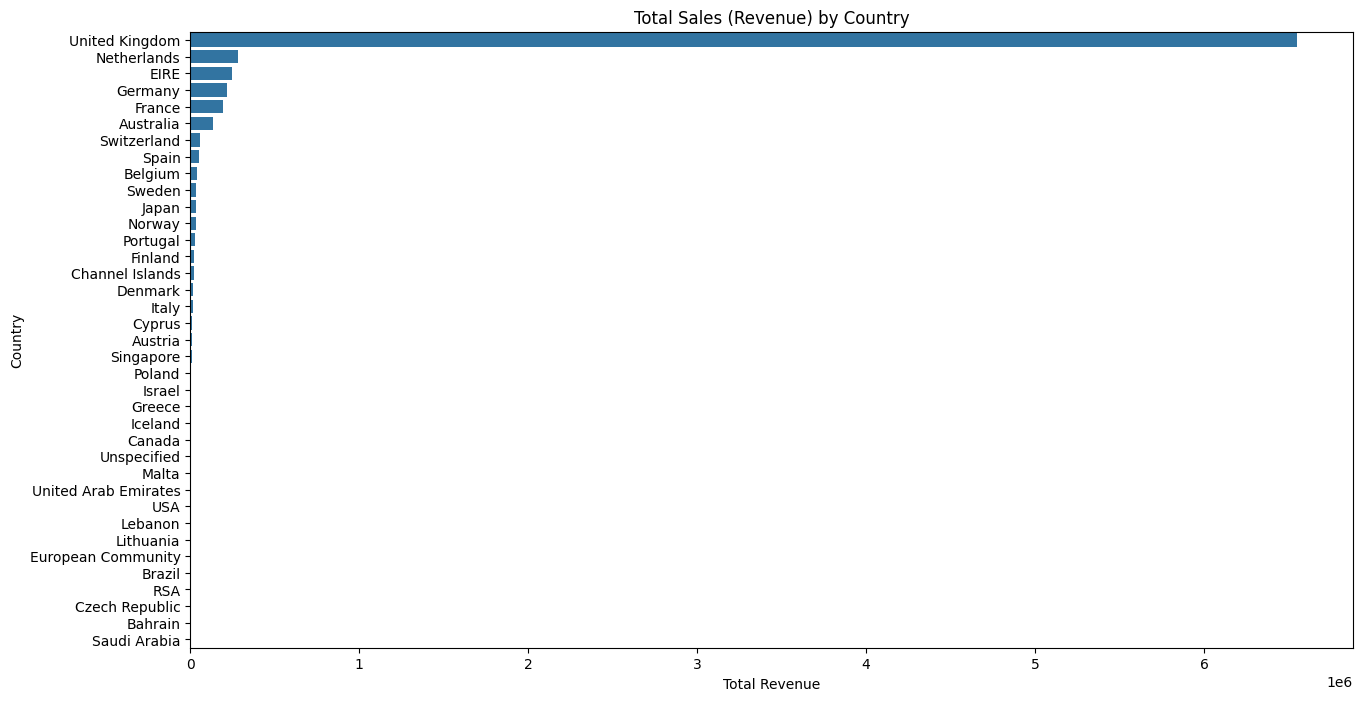

In [34]:
total_revenue_by_country = df.groupby('Country')['Revenue'].sum()
total_revenue_by_country = total_revenue_by_country.sort_values(ascending=False)
top_countries_by_revenue = total_revenue_by_country.head(10)

plt.figure(figsize=(15, 8))
sns.barplot(x=total_revenue_by_country.values, y=total_revenue_by_country.index)
plt.title('Total Sales (Revenue) by Country')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.show()


Average Unit Price and Quantity sold per country

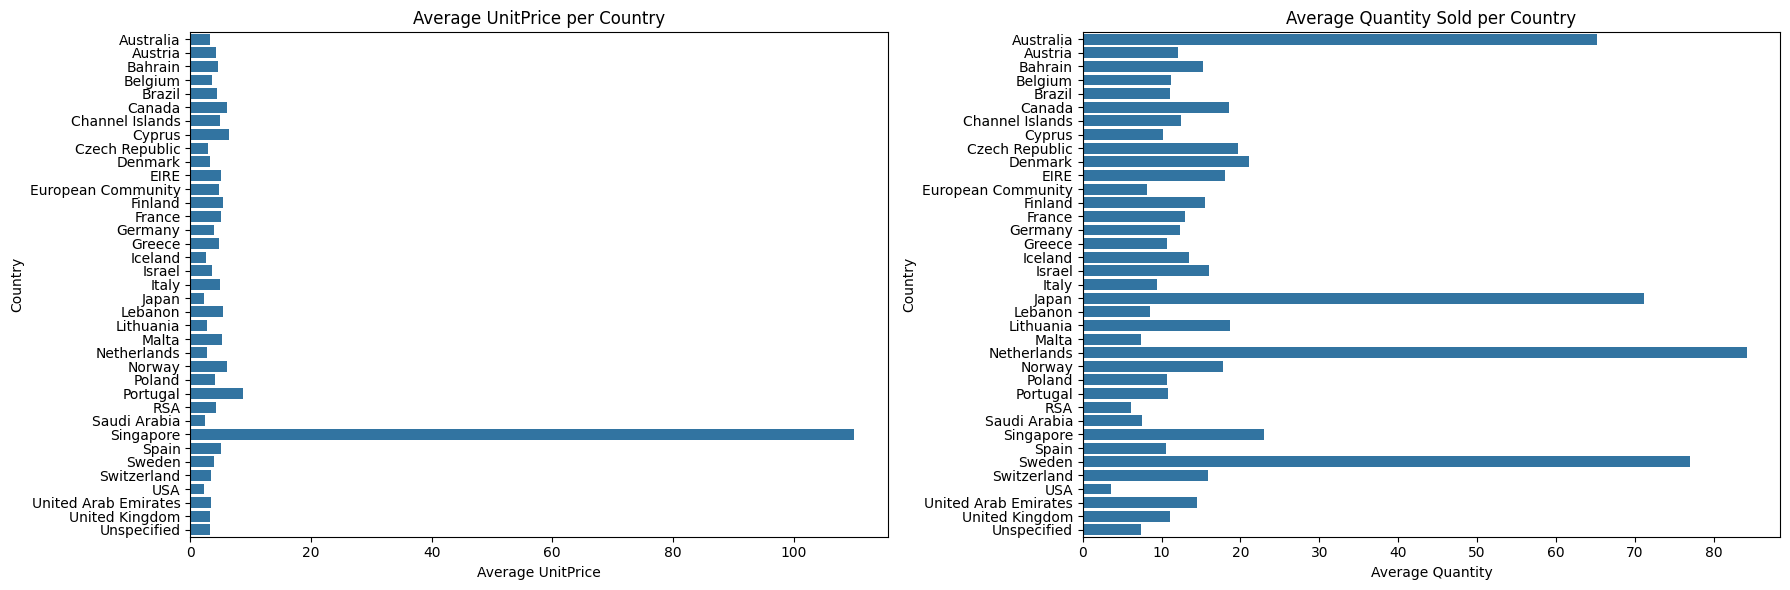

In [35]:
average_metrics_per_country = df.groupby('Country').agg({'UnitPrice': 'mean', 'Quantity': 'mean'})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

 #average revenue
# Average UnitPrice per Country
sns.barplot(x=average_metrics_per_country['UnitPrice'], y=average_metrics_per_country.index, ax=axes[0])
axes[0].set_title('Average UnitPrice per Country')
axes[0].set_xlabel('Average UnitPrice')
axes[0].set_ylabel('Country')

# Average Quantity per Country
sns.barplot(x=average_metrics_per_country['Quantity'], y=average_metrics_per_country.index, ax=axes[1])
axes[1].set_title('Average Quantity Sold per Country')
axes[1].set_xlabel('Average Quantity')
axes[1].set_ylabel('Country')

plt.tight_layout()
plt.show()


Average Quantity Sold per Day, Month and Year

In [36]:
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek  # Monday=0, Sunday=6
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year


/var/folders/pd/lxnkslc138l6f4x6t0pvv_0w0000gn/T/ipykernel_6661/815788351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek  # Monday=0, Sunday=6
/var/folders/pd/lxnkslc138l6f4x6t0pvv_0w0000gn/T/ipykernel_6661/815788351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['InvoiceDate'].dt.month
/var/folders/pd/lxnkslc138l6f4x6t0pvv_0w0000gn/T/ipykernel_6661/815788351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [37]:
average_quantity_per_day = df.groupby('DayOfWeek')['Quantity'].mean()
average_quantity_per_month = df.groupby('Month')['Quantity'].mean()
average_quantity_per_year = df.groupby('Year')['Quantity'].mean()


/var/folders/pd/lxnkslc138l6f4x6t0pvv_0w0000gn/T/ipykernel_6661/3798402124.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(day_labels)


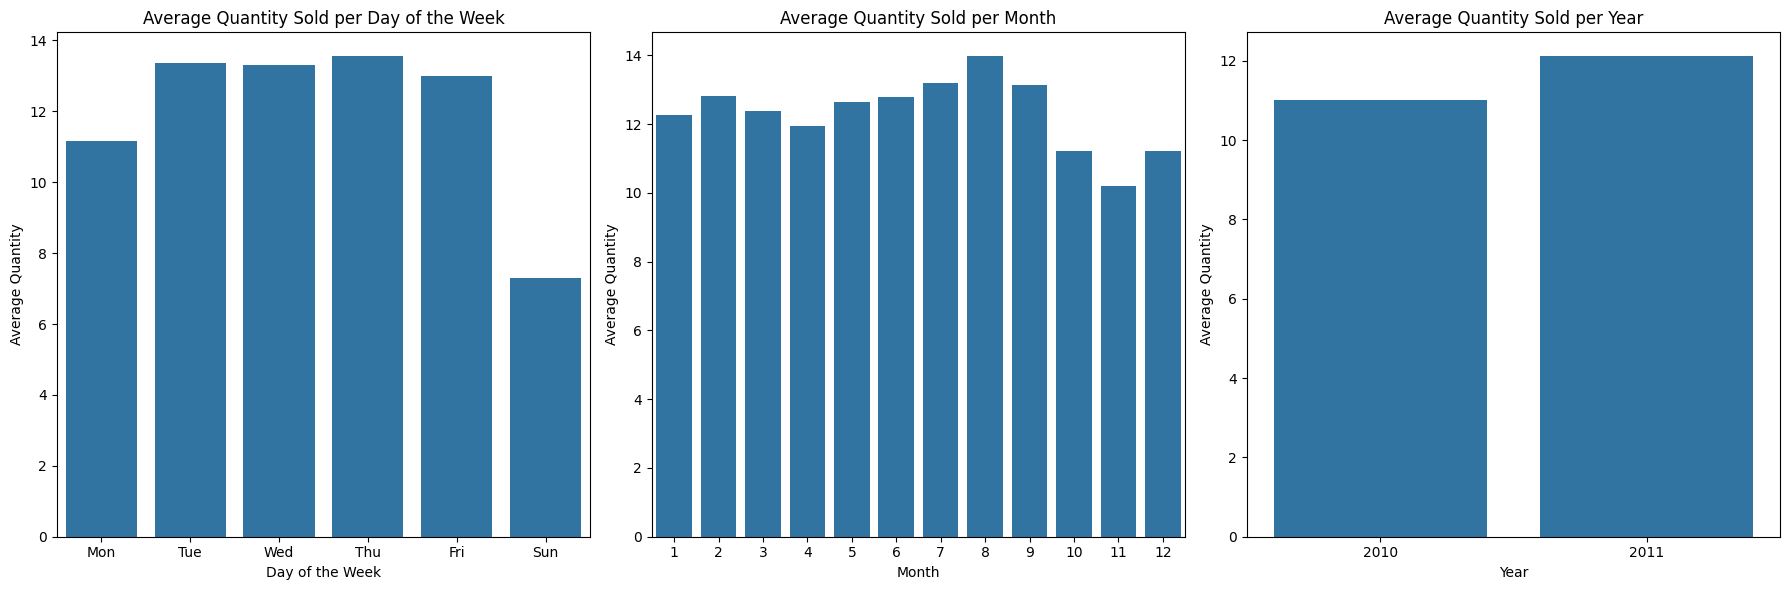

In [38]:
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sun']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Average Quantity per Day of the Week
sns.barplot(x=average_quantity_per_day.index, y=average_quantity_per_day.values, ax=axes[0])
axes[0].set_title('Average Quantity Sold per Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Average Quantity')
axes[0].set_xticklabels(day_labels)

# Average Quantity per Month
sns.barplot(x=average_quantity_per_month.index, y=average_quantity_per_month.values, ax=axes[1])
axes[1].set_title('Average Quantity Sold per Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average Quantity')

# Average Quantity per Year
sns.barplot(x=average_quantity_per_year.index, y=average_quantity_per_year.values, ax=axes[2])
axes[2].set_title('Average Quantity Sold per Year')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Average Quantity')

plt.tight_layout()
plt.show()

Performing Independent-Sample t-test on Hypothesis 1 : Customers from the UK Generate significantly more revenue than customers from other countries.

H0: There is no significant difference in average revenue between customers from the UK and other countries

H1: There is a significant difference in average revenue between customers from the UK and other countries.

In [39]:
uk_revenues = df[df['Country'] == 'United Kingdom']['Revenue']
other_countries_revenues = df[df['Country'] != 'United Kingdom']['Revenue']

t_stat, p_value = ttest_ind(uk_revenues, other_countries_revenues, equal_var=False, nan_policy='omit')

alpha = 0.05
print("t-statistic:", t_stat)
print("p-value:", p_value)
# Determine whether to reject the null hypothesis
if p_value < alpha:
    print("Reject H0: There is significant difference in average revenue between customers from the UK and other countries.")
else:
    print("Fail to Reject H1: There is no significant difference in average revenue between customers from the UK and other countries.")


t-statistic: -25.450681756202123
p-value: 1.8632622137001234e-142
Reject H0: There is significant difference in average revenue between customers from the UK and other countries.


Hypothesis 2:  Higher-priced items (above the median price) are less frequently sold than lower-priced items

H0: There a significant difference in sales frequency for hiher priced items than lower priced items.

H1: There a no significant difference in sales frequency for hiher priced items than lower priced items.


Chi Square Test to check relationship between two categorical variables (sales frequency in terms of items priced above and below the median)



In [40]:
median_unit_price = df['UnitPrice'].median()

#creating a new column in df
df['PriceCategory'] = df['UnitPrice'].apply(lambda x: 'Above Median' if x > median_unit_price else 'Below Median')

transaction_counts = df['PriceCategory'].value_counts()

contingency_table = pd.crosstab(df['PriceCategory'], df['InvoiceNo'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:")
print(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("Reject H0: There is a significant difference in sales frequency for hiher priced items than lower priced items.")
else:
    print("Fail to Reject H1: There is no significant difference in sales frequency for hiher priced items than lower priced items.")





/var/folders/pd/lxnkslc138l6f4x6t0pvv_0w0000gn/T/ipykernel_6661/2015529978.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PriceCategory'] = df['UnitPrice'].apply(lambda x: 'Above Median' if x > median_unit_price else 'Below Median')


Contingency Table:
InvoiceNo      536365  536366  536367  536368  536369  536370  536371  536372  \
PriceCategory                                                                   
Above Median        7       0      10       4       1       8       1       0   
Below Median        0       2       2       0       0      12       0       2   

InvoiceNo      536373  536374  ...  C581463  C581464  C581465  C581466  \
PriceCategory                  ...                                       
Above Median       12       1  ...        1        2        2        3   
Below Median        4       0  ...        0        0        2        1   

InvoiceNo      C581468  C581470  C581490  C581499  C581568  C581569  
PriceCategory                                                        
Above Median         1        1        0        1        1        0  
Below Median         1        0        2        0        0        2  

[2 rows x 22161 columns]
Chi-Square Statistic: 67588.27718321091
P-Value: 0.0
